# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Churn.csv")
df.shape

(7043, 21)

### Understanding the data

In [2]:
df.describe()# only three are numeric features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Total charges should be numeric but here they given as object

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### There are no null values in data 
### We also can conclude that Customer ID is not required for model generating

In [5]:
df['Churn'].value_counts()/df.shape[0]*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### we can see that 73 % data is No and 26% data is Yes.

### Data Manipulation

In [6]:
for x in df['TotalCharges']:
    try:
        float(x)
    except:
        print("____"+x+"_____")

____ _____
____ _____
____ _____
____ _____
____ _____
____ _____
____ _____
____ _____
____ _____
____ _____
____ _____


### we can observe that some spaces are there in data instead of numbers we will fill them with null values now we are having null values in data.


In [7]:
for i in range(len(df['TotalCharges'])):
    if(df['TotalCharges'][i]==" " or df['TotalCharges'][i]==""):
        df['TotalCharges'][i]=np.nan
    else:
        df['TotalCharges'][i] = float(df['TotalCharges'][i])

<ipython-input-7-1be6efa6859b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][i] = float(df['TotalCharges'][i])
<ipython-input-7-1be6efa6859b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][i]=np.nan


In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df['TotalCharges'].isnull().sum()/df.shape[0]*100

0.1561834445548772

### since very less null values 0.15% are there we can remove them.

In [10]:
df.dropna(inplace=True)

In [11]:
 df['TotalCharges'] = df['TotalCharges'].astype(float)

### we can remove customerid colum because it is not useful for model creation

In [12]:
df.drop(['customerID'],axis=1,inplace=True)

### We will convert all categorical values to numeric encoding to easily deal with ML models and calculations 

In [13]:
df.columns[df.dtypes==np.object]

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [14]:
from sklearn import preprocessing

In [15]:
categorical_column = list(df.columns[df.dtypes==np.object])
data_encoded = df.copy(deep=True)#deep copying
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])#column names keeping same
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))#automatic labeling
        print('Feature', col)#printing All 
        print('mapping', le_name_mapping)

Feature gender
mapping {'Female': 0, 'Male': 1}
Feature Partner
mapping {'No': 0, 'Yes': 1}
Feature Dependents
mapping {'No': 0, 'Yes': 1}
Feature PhoneService
mapping {'No': 0, 'Yes': 1}
Feature MultipleLines
mapping {'No': 0, 'No phone service': 1, 'Yes': 2}
Feature InternetService
mapping {'DSL': 0, 'Fiber optic': 1, 'No': 2}
Feature OnlineSecurity
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature OnlineBackup
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature DeviceProtection
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature TechSupport
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature StreamingTV
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature StreamingMovies
mapping {'No': 0, 'No internet service': 1, 'Yes': 2}
Feature Contract
mapping {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
Feature PaperlessBilling
mapping {'No': 0, 'Yes': 1}
Feature PaymentMethod
mapping {'Bank transfer (automatic)': 0, 'Credit card (autom

### Data Visualization

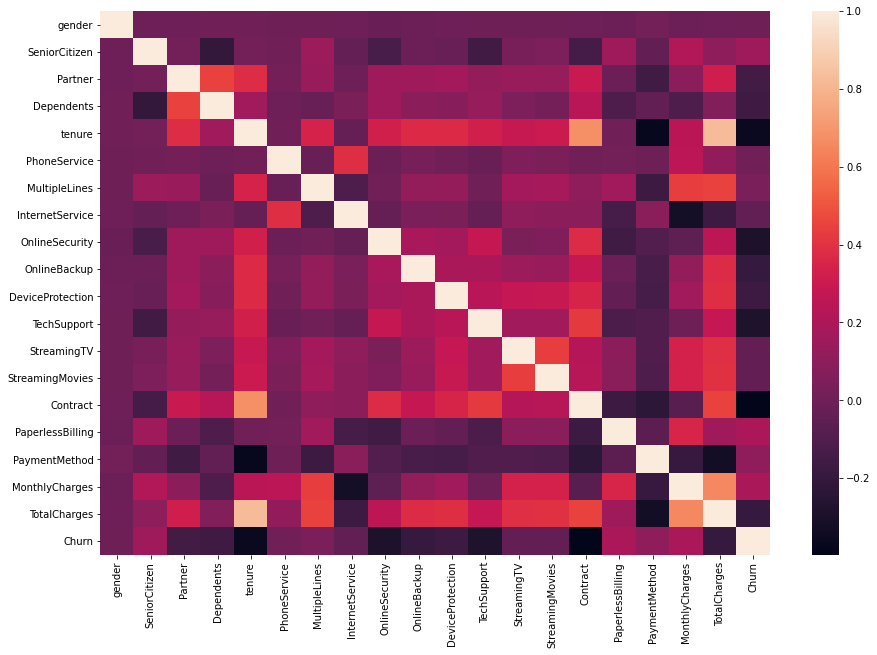

In [16]:
data_correlation = data_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]#corellation graph
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

### observations
* we can observe that tenure,onlinesecurity,techsupport and contract are negatively correlaeted to churn.
* Tenure and Total charges are highly correlated we know this becuse with increase in tenure the total charges will automaticallty increase

### we will visualize each feature with Churn 

In [17]:
plt.rcParams["figure.figsize"] = [10,7]

### 1)Gender vs Churn

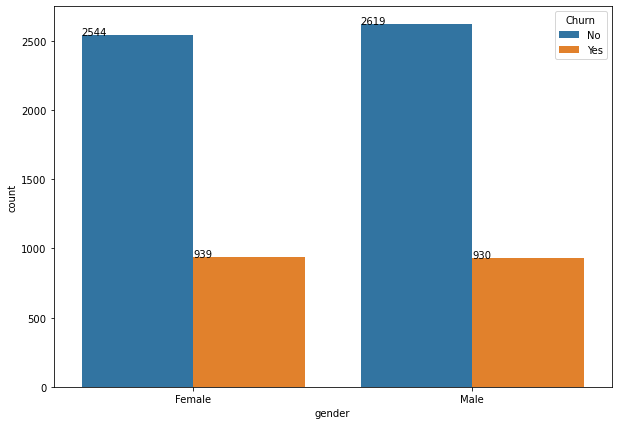

In [18]:
ax = sns.countplot(x="gender", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [19]:
2544/939,2619/930


(2.70926517571885, 2.8161290322580643)

### observations
* we can see the male and female are equally proportioned in Churn so there is no effect in Churn due to gender

###  2) Seniorcitizen vs churn

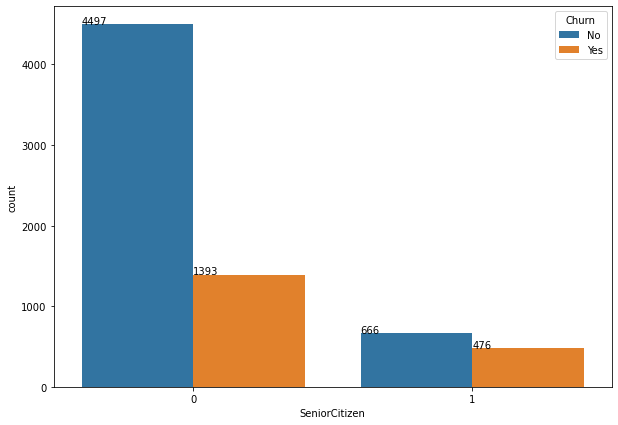

In [20]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [21]:
4497/1393,666/476

(3.228284278535535, 1.3991596638655461)

### observations
* from above we can observe that Senior citizens are more in proportional in stopping the Telecom service 

### 3) Partner vs Churn

In [22]:
data_encoded['Partner'].value_counts()

0    3639
1    3393
Name: Partner, dtype: int64

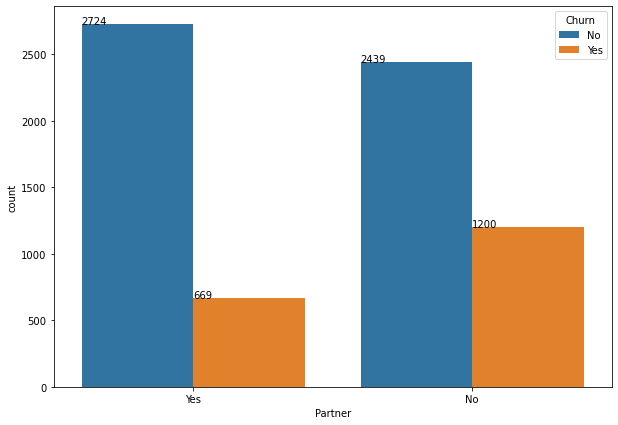

In [23]:
ax = sns.countplot(x="Partner", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [24]:
2724/669,2439/1200

(4.071748878923767, 2.0325)

### observations
* From above we can observe that the persons with no partner are stopping the Telecom service Double in comparision to persons with partner.

### 4) Dependents vs Churn

In [25]:
data_encoded['Dependents'].value_counts()

0    4933
1    2099
Name: Dependents, dtype: int64

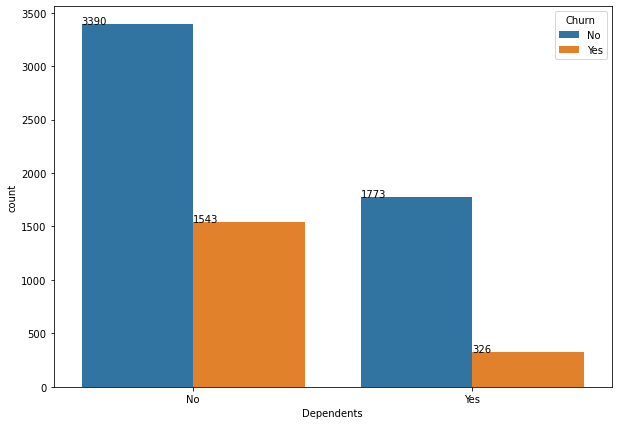

In [26]:
ax = sns.countplot(x="Dependents", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [27]:
3390/1543,1773/326

(2.1970187945560595, 5.438650306748467)

### observations
* From above we can observe that the persons who are Independent are more willing to stop the telecom service

### 5) Tenure vs Churn

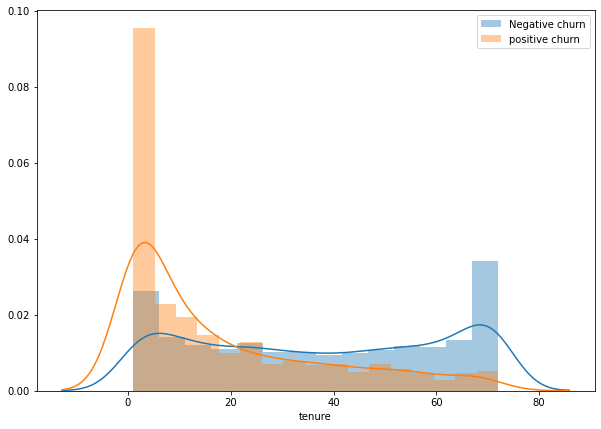

In [28]:
positive_churn_df = data_encoded.loc[data_encoded['Churn'] == 1]#left 
negative_churn_df = data_encoded.loc[data_encoded['Churn'] == 0]#continued
sns.distplot(negative_churn_df['tenure'], label='Negative churn')
sns.distplot(positive_churn_df['tenure'],label='positive churn')
plt.legend()

### observations
* The people with less tenure are more likely to stop telecom service
* the people with high tenure or less likely to stop telecom service

### 6) Phone Service vs Churn

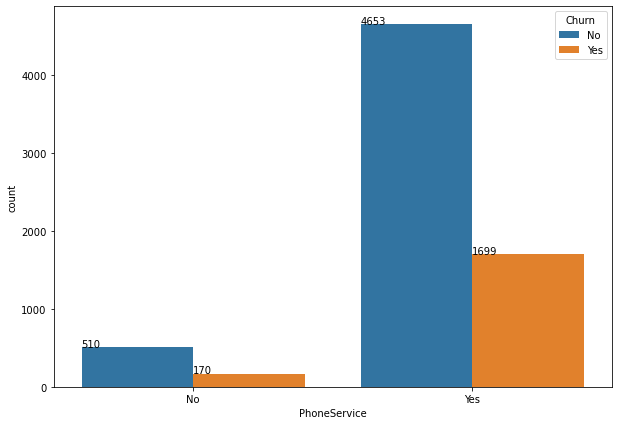

In [29]:
ax = sns.countplot(x="PhoneService", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [30]:
510/170,4653/1699

(3.0, 2.7386698057680987)

### observations
* From the above graphs we can observe that The persons with phone Serviced are slighly more likely to Stop Telecom service


### 7) MultipleLines vs Churn

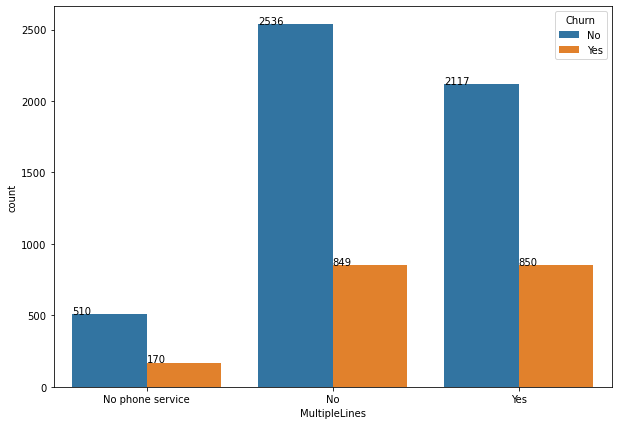

In [31]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [32]:
510/170,2536/849,2117/850

(3.0, 2.9870435806831566, 2.4905882352941178)

### observations
* The persons with no Phone servile are less likely to stop Service 
* the persons with Multiple lines are more likely willing to stop the service 

### 8) Internet Service vs Churn

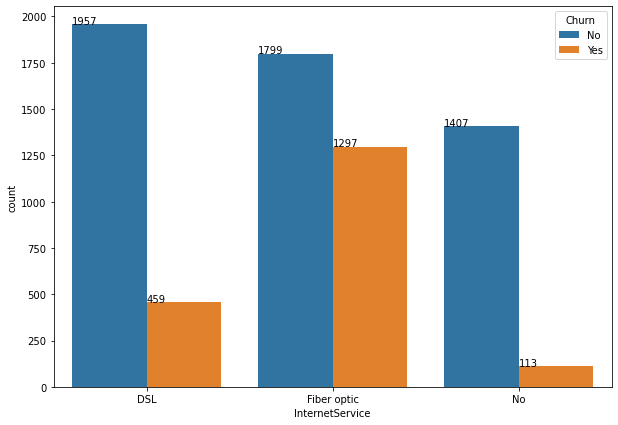

In [33]:
ax = sns.countplot(x=df.columns[7], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [34]:
1957/459,1799/1297,1407/113

(4.2636165577342044, 1.387047031611411, 12.451327433628318)

### observations
* The persons with No Internet Service are very very less likely to Stop the service.
* The persons with Fiber optics are very much likely to stop the Service.


### 9) OnlineSecurity vs Churn

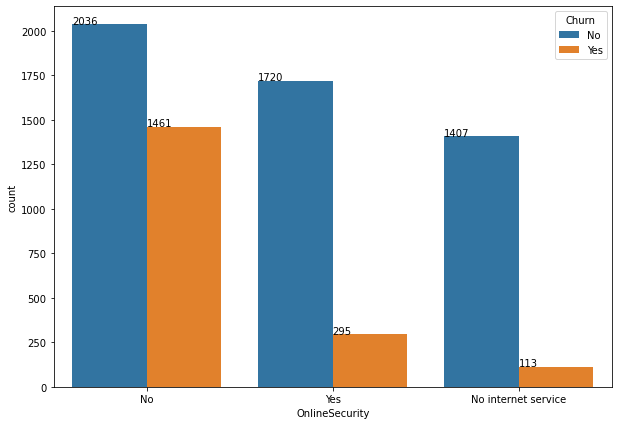

In [35]:
ax = sns.countplot(x=df.columns[8], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [36]:
2036/1461,1720/395,1407/113

(1.3935660506502396, 4.3544303797468356, 12.451327433628318)

### observations
* The persons with no Online Security are very much likey to Stop Service.

### 10) Online Backup vs Churn

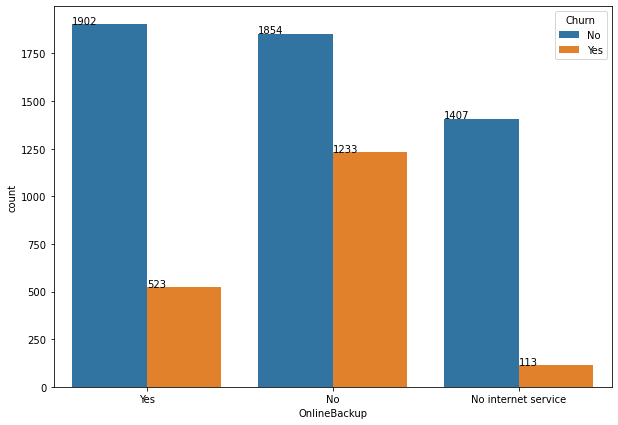

In [37]:
ax = sns.countplot(x=df.columns[9], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [38]:
1902/523,1854/1233,1407/113

(3.636711281070746, 1.5036496350364963, 12.451327433628318)

### observations
* The persons with No Online Backup are more willing to stop the Service.

### 11) Drive Protection vs Churn

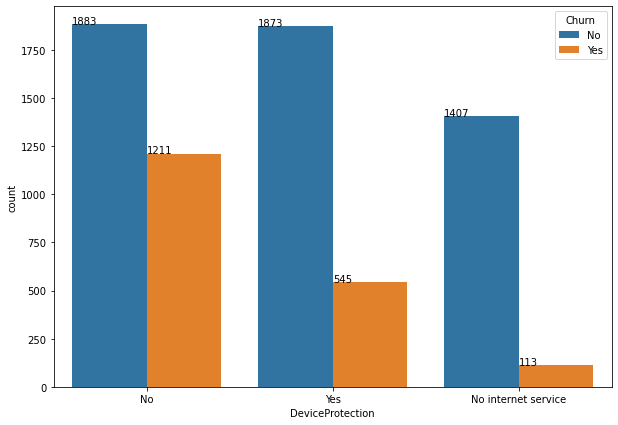

In [39]:
ax = sns.countplot(x=df.columns[10], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [40]:
1883/1211,1873/545,1407/113

(1.5549132947976878, 3.436697247706422, 12.451327433628318)

### observations
* The persons with No device Protection are more willing to Stop Service

### 12) TechSupport vs Churn

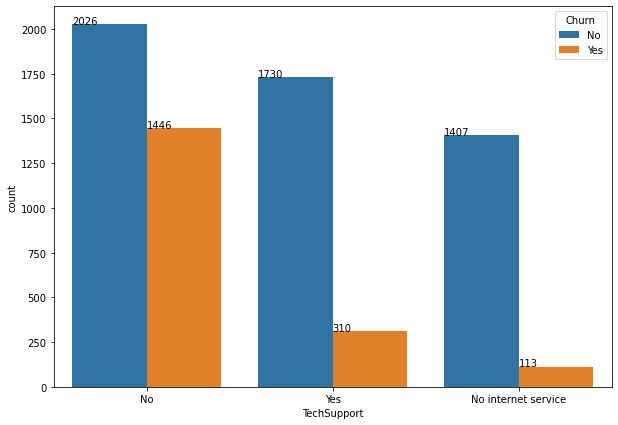

In [41]:
ax = sns.countplot(x=df.columns[11], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [42]:
2026/1446,1730/310,1407/113

(1.4011065006915628, 5.580645161290323, 12.451327433628318)

### observations
* The Persons with No Tech Support are more likely to Stop The service.

### 13) StreamingTV vs Churn

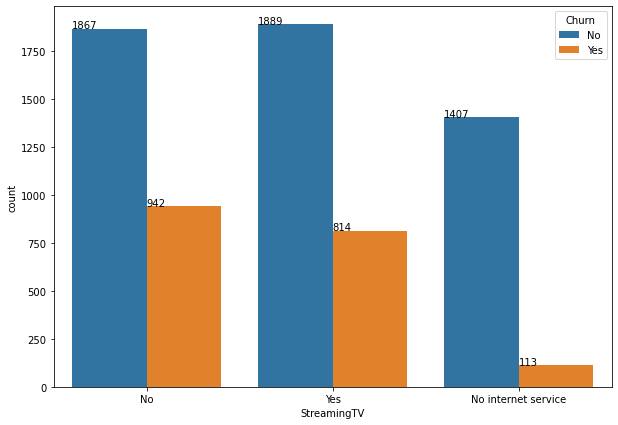

In [43]:
ax = sns.countplot(x=df.columns[12], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [44]:
1867/942,1889/814,1407/113

(1.9819532908704882, 2.3206388206388207, 12.451327433628318)

### observations
* The Persons with Streming tv and Not Streaming TV are more or less simlilar so it will not effect Churn That Much.

### 14) StreamingMovies vs Churn

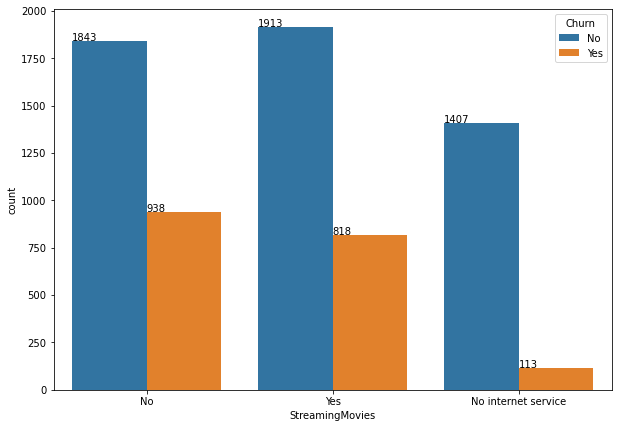

In [45]:
ax = sns.countplot(x=df.columns[13], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [46]:
1843/938,1913/818,1407/113

(1.964818763326226, 2.338630806845966, 12.451327433628318)

### observations
* If we observe this Distribution it is very similar to Streaming Movies so we can exclude this columns for further Modeling process.

### 15) Contract vs Churn

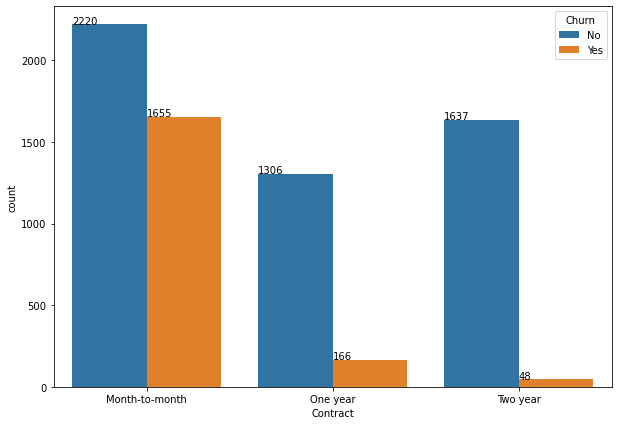

In [47]:
ax = sns.countplot(x=df.columns[14], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [48]:
2220/1655,1306/133,1637/48

(1.3413897280966767, 9.819548872180452, 34.104166666666664)

### observations
* The Persons with Month-to-Month contract are more likely to Stop the Service.
* The persons with Two Year contract are very very minute likely to stop the Service.

### 16) PaperlessBilling vs Churn

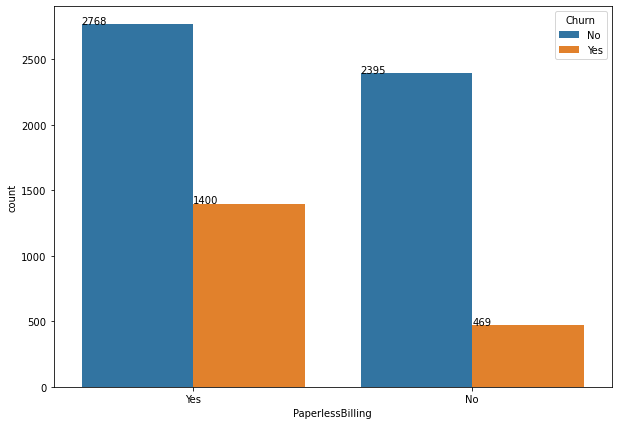

In [49]:
ax = sns.countplot(x=df.columns[15], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [50]:
2768/1400,2395/469

(1.977142857142857, 5.106609808102346)

### observations
* The Persons with PaperlessBilling are much likely to stop the Service than Persons with Paper Billing.

### 17) PaymentMethod vs Churn

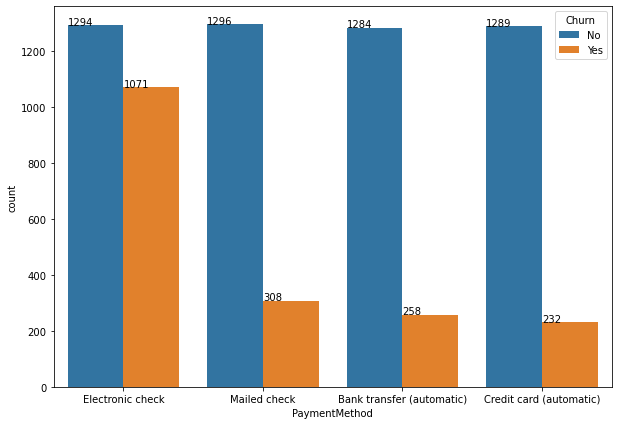

In [51]:
ax = sns.countplot(x=df.columns[16], hue="Churn", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [52]:
1294/1071,1296/308,1284/258,1289/232

(1.2082166199813258, 4.207792207792208, 4.976744186046512, 5.556034482758621)

### observations
* The Persons who are paying with Electronic Check are more likely to stop the Service.

### 18)  MonthlyCharges vs Churn

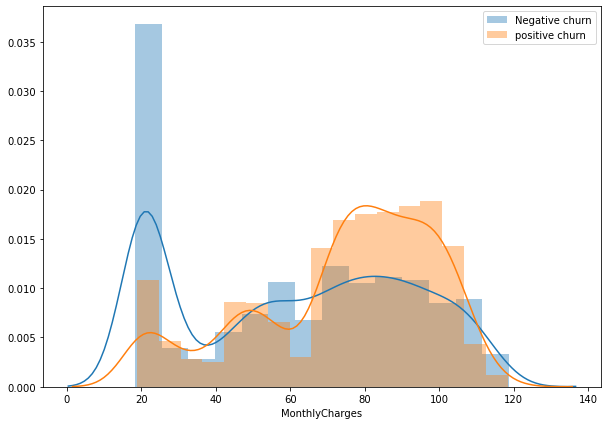

In [53]:
positive_churn_df = data_encoded.loc[data_encoded['Churn'] == 1]#left 
negative_churn_df = data_encoded.loc[data_encoded['Churn'] == 0]#continued
sns.distplot(negative_churn_df['MonthlyCharges'], label='Negative churn')
sns.distplot(positive_churn_df['MonthlyCharges'],label='positive churn')
plt.legend()

### observations
* The Persons with High Monthly charges are more likely to stop the Service.
* The Persons with low Monthly charges are less likely to stop the Service.

### 19) TotalCharges vs Churn

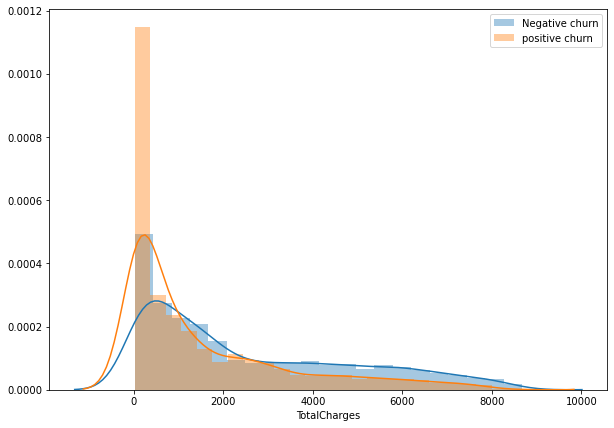

In [54]:
positive_churn_df = data_encoded.loc[data_encoded['Churn'] == 1]#left 
negative_churn_df = data_encoded.loc[data_encoded['Churn'] == 0]#continued
sns.distplot(negative_churn_df['TotalCharges'], label='Negative churn')
sns.distplot(positive_churn_df['TotalCharges'],label='positive churn')
plt.legend()

### observations
* The Persons with Moderate and high total charges are less likely to Stop the Service.
* The persons with very very less total charges are more likely to Stop the Service, Its an intresting point.

In [55]:
### Conclusion: What all did you understand from the above charts

## Splitting and Removing Imbalance in the Data on Churn UJsing Smote Method

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [57]:
X = data_encoded[df.columns[1:19]] 
y = data_encoded['Churn']
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
X_train.shape,X_test.shape

((5274, 18), (1758, 18))

In [60]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [61]:
X_train_res.shape,y_train_res.shape

((7704, 18), (7704,))

In [62]:
pd.Series(y_train_res).value_counts()

1    3852
0    3852
dtype: int64

### Now our data is balanced 

### Implement Machine Learning Models

In [63]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [64]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('ADA', AdaBoostClassifier()),
          ('XGB', XGBClassifier()),
         ('LGBM',LGBMClassifier())]


In [65]:
random_seed = 1
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model,X_train_res,y_train_res , cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

LogReg| Mean=0.779610 STD=0.042267
DecTree| Mean=0.796361 STD=0.065738


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN| Mean=0.754561 STD=0.049479


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinDisc| Mean=0.778708 STD=0.058415


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GaussianNB| Mean=0.766376 STD=0.055195


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ADA| Mean=0.811553 STD=0.073956


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


XGB| Mean=0.842581 STD=0.086677
LGBM| Mean=0.839466 STD=0.084400


### So XGBoost algorithm performed best among all. so we will use that model.

### Model Evaluation

In [66]:
from sklearn.metrics import classification_report
xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=50, max_depth=15)
xb.fit(X_train_res,y_train_res)
print(classification_report( xb.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1295
           1       0.58      0.56      0.57       463

    accuracy                           0.78      1758
   macro avg       0.71      0.71      0.71      1758
weighted avg       0.77      0.78      0.77      1758



In [67]:
from yellowbrick.classifier import ROCAUC

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


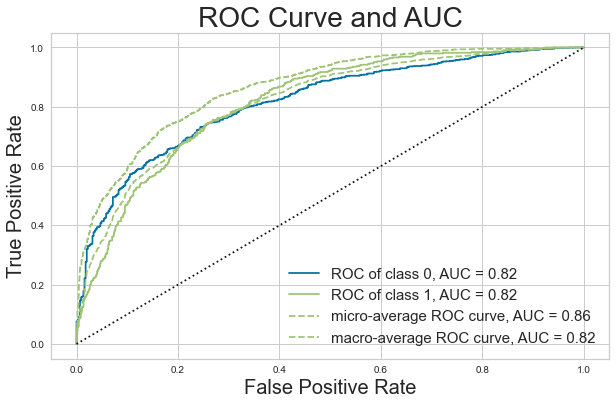

In [68]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(xb)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)

plt.legend(fontsize=15)


* from above we can see that our model is having best F1 score of 0.85 so it will work best on both churn and non churn candidates 
* From AUCRUC also we observe that the area under the curve is about 0.85 our model performed best oon the data.

### Final Conclusions

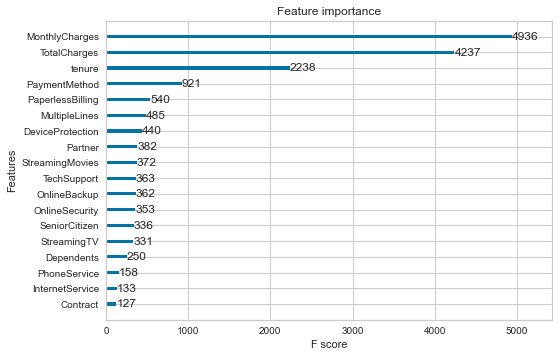

In [69]:
from xgboost import plot_importance
ax=plot_importance(xb)
ax.figure.savefig('XGB_Feature.png')

* From the Graph we can observe that the MonthlyCharges, Total Charges and Tenure is the key factors for Churn.

### OFFERS 
* we can reduce the cost for more tenure so that more customers will stay in service.

* Since From graph we onbserve the charges and tenure is more important for the customer churn if we implement our offer definately we will decrease the churn rate and attract some new customers.
* Since the offer is implemented the churn rate is automatically reduced according to the Model.